In [ ]:
!unzip /content/Train.zip

In [2]:
import torch as th
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from torch.utils.data import Subset
from torch.utils.data import DataLoader

In [4]:
from torchvision.datasets import ImageFolder
import torchvision.transforms as transform

In [5]:
data = ImageFolder('/content/Train/',transform=transform.ToTensor())

In [6]:
newdataset = []

In [7]:
input = []
target = []

In [ ]:
!pip install antspyx

In [ ]:
import ants

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
for i in range(int(len(data)/2)):
  im = data[i][0].numpy()
  #img = ants.from_numpy(im)
  corrected = im#ants.n3_bias_field_correction(img).numpy()
  input.append(corrected)
  im = data[28+i][0].numpy()
  #img = ants.from_numpy(im)
  corrected = im#ants.n3_bias_field_correction(img).numpy()
  target.append(corrected)
  #newdataset.append((data[i][0].numpy(),data[28+i][0].numpy()))


In [9]:
input = th.from_numpy(np.array(input))
target = th.from_numpy(np.array(target))

In [10]:
from torch.utils.data import random_split,TensorDataset

In [11]:
newdataset = TensorDataset(input,target)

In [12]:
val = 5
org = len(newdataset)-val

In [13]:
train_ds,val_ds = random_split(newdataset,[org,val])

In [14]:
train_dl = DataLoader(train_ds,1)
val_dl = DataLoader(val_ds,1)

# T1-Weighted Images

In [ ]:
ax,fig = plt.subplots(7,4,figsize=(15,15))
r=c=1
for img,lab in t1_train_dl:
  fig[r-1][c-1].imshow(img[0].permute(1,2,0),cmap='gray')
  if c%4==0:
    r = r+1
  c = (c+1)%4

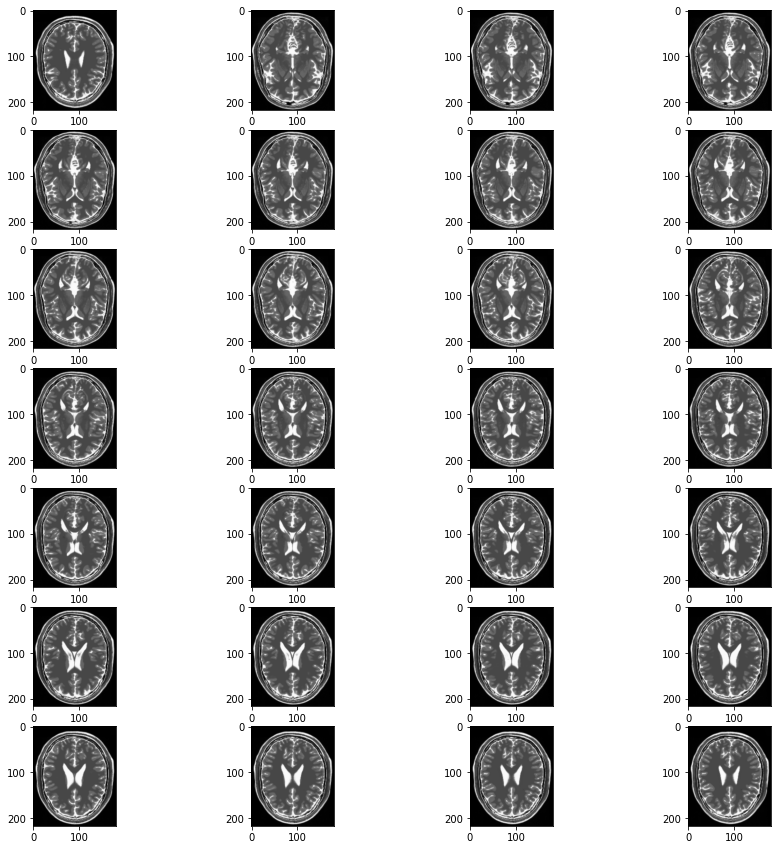

In [ ]:
ax,fig = plt.subplots(7,4,figsize=(15,15))
r=c=1
for img,lab in t1_train_dl:
  fig[r-1][c-1].imshow(img[0].permute(1,2,0),cmap='gray')
  if c%4==0:
    r = r+1
  c = (c+1)%4

# T2-Weighted Images

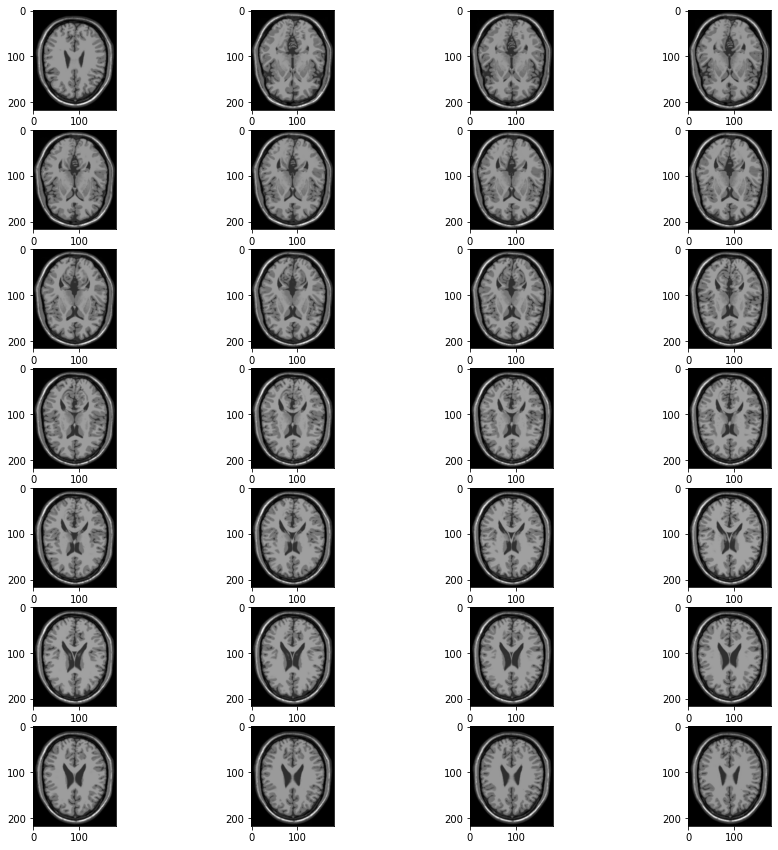

In [ ]:
ax,fig = plt.subplots(7,4,figsize=(15,15))
r=c=1
for img,lab in t2_train_dl:
  fig[r-1][c-1].imshow(img[0].permute(1,2,0),cmap='gray')
  if c%4==0:
    r = r+1
  c = (c+1)%4

# Preprocessing

In [ ]:
!pip install antspyx

In [ ]:
import ants

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Biase-Field-Correction

In [ ]:
def correct(images):
  imgtensor = []
  for i in range(len(images)):
    img = ants.from_numpy(images[i][0].numpy())
    corrected = ants.n3_bias_field_correction(img)
    imgtensor.append(corrected.numpy())
  return th.tensor(imgtensor)

In [ ]:
t1_train_bfc = correct(t1_train)

In [ ]:
t2_train_bfc = correct(t2_train)

In [ ]:
t1_train_pre = th.utils.data.Subset(t1_train_bfc,list(range(0,len(t1_train_bfc))))
t2_train_pre = th.utils.data.Subset(t2_train_bfc,list(range(0,len(t2_train_bfc))))

In [ ]:
t1_train_pre_dl = DataLoader(t1_train_pre,1)

# Comparing Correted Images

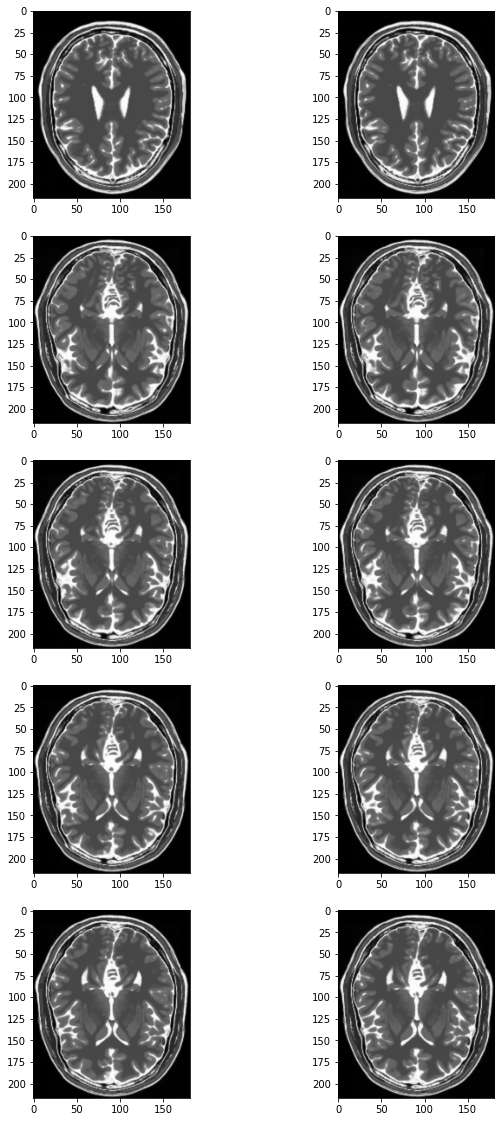

In [ ]:
fig,ax = plt.subplots(5,2,figsize=(10,20))
for i in range(len(t1_train)):
  im1 = t1_train[i][0]
  im2 = t1_train_pre[i]
  ax[i][0].imshow(im1.permute(1,2,0),cmap='gray')
  ax[i][1].imshow(im2.permute(1,2,0),cmap='gray')
  if i>=4:
    break

In [ ]:
t1_train[0][0].shape

torch.Size([3, 217, 181])

In [ ]:
image = ants.image_read(ants.get_ants_data('r16'))
image = ants.from_numpy(t2_train[0][0].numpy())
mask = ants.get_mask(image)
fuzzy = ants.fuzzy_spatial_cmeans_segmentation(image, mask, number_of_clusters=3)

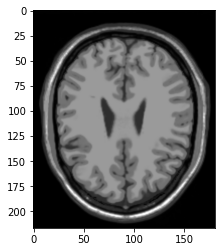

In [ ]:
plt.imshow(image.numpy().transpose(1,2,0),cmap='gray')

In [ ]:
fuzzy

{'probability_images': [ANTsImage (RAI)
  	 Pixel Type : float (float32)
  	 Components : 1
  	 Dimensions : (3, 217, 181)
  	 Spacing    : (1.0, 1.0, 1.0)
  	 Origin     : (0.0, 0.0, 0.0)
  	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.], ANTsImage (RAI)
  	 Pixel Type : float (float32)
  	 Components : 1
  	 Dimensions : (3, 217, 181)
  	 Spacing    : (1.0, 1.0, 1.0)
  	 Origin     : (0.0, 0.0, 0.0)
  	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.], ANTsImage (RAI)
  	 Pixel Type : float (float32)
  	 Components : 1
  	 Dimensions : (3, 217, 181)
  	 Spacing    : (1.0, 1.0, 1.0)
  	 Origin     : (0.0, 0.0, 0.0)
  	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]],
 'segmentation_image': ANTsImage (RAI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (3, 217, 181)
 	 Spacing    : (1.0, 1.0, 1.0)
 	 Origin     : (0.0, 0.0, 0.0)
 	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]}

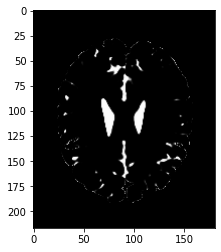

In [ ]:
plt.imshow(fuzzy['probability_images'][0].numpy().transpose(1,2,0),cmap='gray')

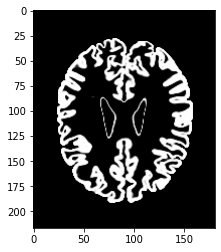

In [ ]:
plt.imshow(fuzzy['probability_images'][1].numpy().transpose(1,2,0),cmap='gray')

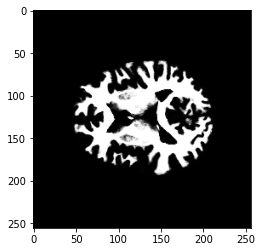

In [ ]:
plt.imshow(fuzzy['probability_images'][2].numpy(),cmap='gray')

In [ ]:
def seg_slice(image):
  seg0 = []
  seg1 = []
  seg2 = []
  for i in range(len(image)):
    print('Image " ',i)
    img = ants.from_numpy(image[i].numpy())
    mask = ants.get_mask(img)
    fuzzy = ants.fuzzy_spatial_cmeans_segmentation(img, mask, number_of_clusters=3)['probability_images']
    seg0.append(fuzzy[0].numpy())
    seg1.append(fuzzy[1].numpy())
    seg2.append(fuzzy[2].numpy())
  return (th.tensor(seg0),th.tensor(seg1),th.tensor(seg2))

In [ ]:
#t1_train_seg0,t1_train_seg1,t1_train_seg2 = seg_slice(t1_train_pre)

In [ ]:
len(t2_train_pre)

28

In [ ]:
t2_train_seg0,t2_train_seg1,t2_train_seg2 = seg_slice(t2_train_pre)

Image "  0
Image "  1
Image "  2
Image "  3
Image "  4
Image "  5
Image "  6
Image "  7
Image "  8
Image "  9
Image "  10
Image "  11
Image "  12
Image "  13
Image "  14
Image "  15
Image "  16
Image "  17
Image "  18
Image "  19
Image "  20
Image "  21
Image "  22
Image "  23
Image "  24
Image "  25
Image "  26
Image "  27


In [ ]:
len(t2_train_seg1)

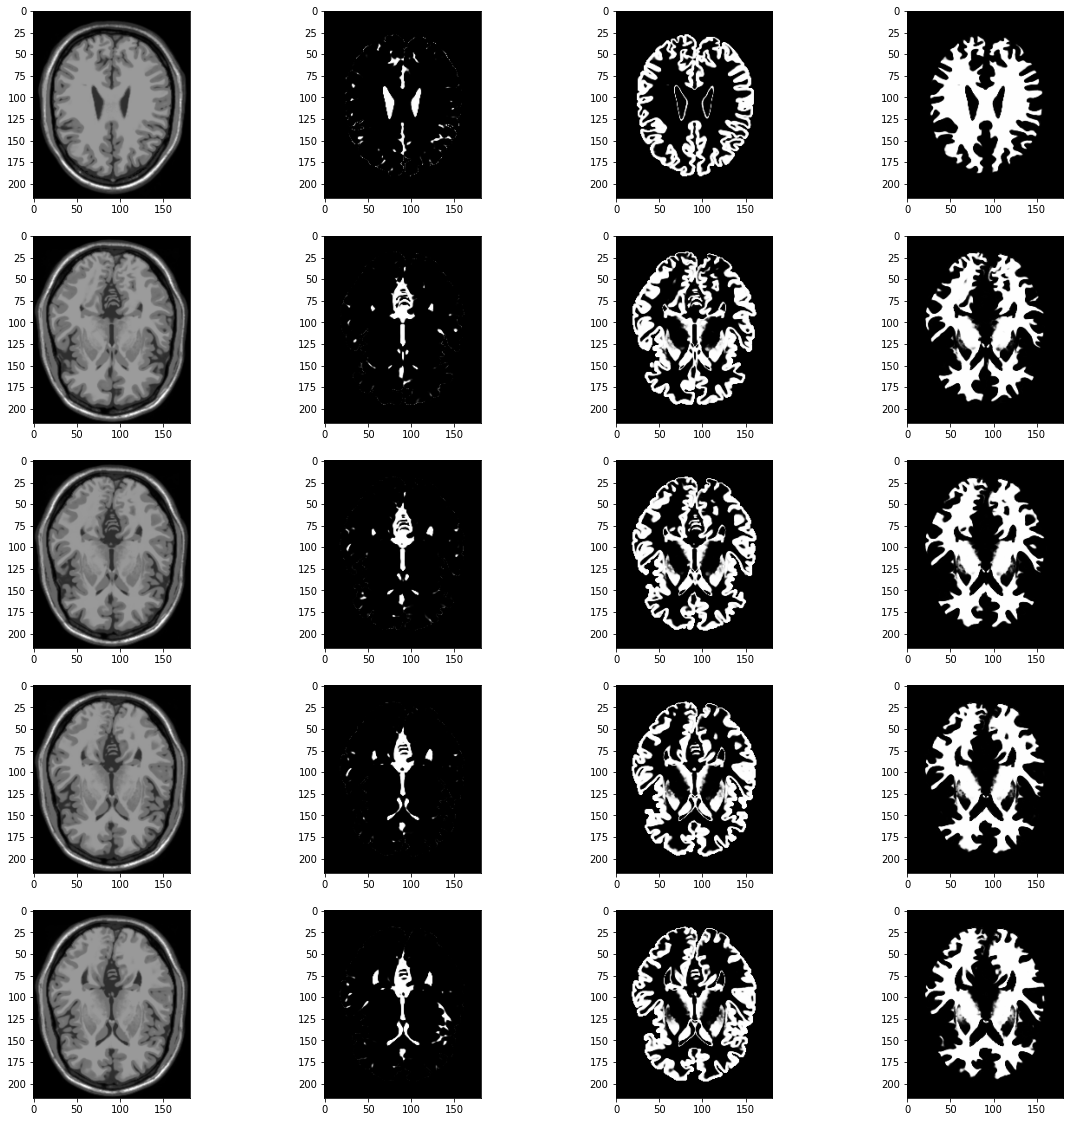

In [ ]:
 fig,ax = plt.subplots(5,4,figsize=(20,20))
for i in range(len(t2_train)):
  im00 = t2_train_pre[i]
  im0 = t2_train_seg0[i]
  im1 = t2_train_seg1[i]
  im2 = t2_train_seg2[i]
  ax[i][0].imshow(im00.permute(1,2,0),cmap='gray')
  ax[i][1].imshow(im0.permute(1,2,0),cmap='gray')
  ax[i][2].imshow(im1.permute(1,2,0),cmap='gray')
  ax[i][3].imshow(im2.permute(1,2,0),cmap='gray')
  if i>=4:
    break

# Model Building

In [15]:
import torch.nn as nn
import torch.nn.functional as F


## Artitecture

In [ ]:
t1_train[0][0].shape

torch.Size([3, 217, 181])

In [21]:
def conv_size(ih,iw,pt,pb,k,s): #ih=input height,iw=input width,pt=padding top,pd=padding down,k=ernal size,s=strid
  print('Height : ',((ih+pt+pb-k)/(s))+1)
  print('Width : ',((iw+pt+pb-k)/(s))+1)


In [22]:
def maxpool(ih,iw,k,s):#ih=input height,iw=input width, k=kerna size,s=strid
  print("Height : ",((ih-k)/s)+1)
  print("Width : ",((iw-k)/s)+1)

In [40]:
conv_size(217,181,0,0,3,2)

Height :  108.0
Width :  90.0


In [41]:
maxpool(108,90,2,2)

Height :  54.0
Width :  45.0


In [44]:
conv_size(54,45,0,0,3,1)

Height :  52.0
Width :  43.0


In [45]:
conv_size(52,43,0,0,3,1)

Height :  50.0
Width :  41.0


In [48]:
maxpool(50,41,3,1)

Height :  48.0
Width :  39.0


In [49]:
conv_size(48,39,0,0,3,1)

Height :  46.0
Width :  37.0


In [52]:
maxpool(46,37,3,1)

Height :  44.0
Width :  35.0


In [ ]:
#print('1 : ',conv_size(53,44,0,0,3,1))
print('2 : ',conv_size(54,45,0,0,3,1))

Height :  52.0
Width :  43.0
2 :  None


In [ ]:
print('1 :',maxpool(52,43,2,1))
#print('2 :',maxpool(52,43,2,1))

Height :  51.0
Width :  42.0
1 : None


In [ ]:
print('1 :',conv_size(51,42,0,0,3,1))
#print('1 :',conv_size(48,39,0,0,3,1))

Height :  49.0
Width :  40.0
1 : None


In [ ]:
maxpool(49,50,3,2),conv_size(49,50,0,0,2,2)

Height :  24.0
Width :  24.5
Height :  24.5
Width :  25.0


(None, None)

In [ ]:
conv_size(47,48,0,0,3,1)

Height :  45.0
Width :  46.0


In [ ]:
49*50*128

313600

In [ ]:
313600**0.5

560.0

In [ ]:
560/4

140.0

In [ ]:
280/2

140.0

## Model Class

In [16]:
class Reshape(nn.Module):
    def __init__(self, *args):
        super().__init__()
        self.shape = args

    def forward(self, x):
        return x.view(self.shape)


class Mod2(nn.Module):
  def __init__(self):
    super(Mod2,self).__init__()
    self.rows = 48#49
    self.cols = 39#40
    self.ltdim = 70#int(128/2)


    self.lay1 = nn.Conv2d(3,32,3,2,0)
    self.lay2 = nn.MaxPool2d(2,2,return_indices=True)
    self.lay3 = nn.Conv2d(32,64,3,1,0)
    self.lay4 = nn.Conv2d(64,128,3,1,0)
    self.lay5 = nn.MaxPool2d(3,1,return_indices=True)
    #self.lay5 = nn.Conv2d(64,128,3,1,0)

    self.dns1 = nn.Linear(128*self.rows*self.cols,560)
    self.dns2 = nn.Linear(560,140)
    #self.dns3 = nn.Linear(140,70)

    self.mean = nn.Linear(140,self.ltdim)
    self.log_var = nn.Linear(140,self.ltdim)
    self.decFCL = nn.Linear(self.ltdim,140)

    #self.dns4 = nn.Linear(70,140)
    self.dns5 = nn.Linear(140,560)
    self.dns6 = nn.Linear(560,128*self.rows*self.cols)

    #self.declay2 = nn.ConvTranspose2d(128,64,3,1,0)
    self.declay1 = nn.MaxUnpool2d(3,1)
    self.declay2 = nn.ConvTranspose2d(128,64,3,1,0)
    self.declay3 = nn.ConvTranspose2d(64,32,3,1,0)
    self.declay4 = nn.MaxUnpool2d(2,2)
    self.declay5 = nn.ConvTranspose2d(32,3,3,2,0)


  def encoder(self,x):
    x = F.leaky_relu(self.lay1(x))
    x,ind1 = self.lay2(x) 
    x = F.leaky_relu(self.lay3(x)) # 2nd Conv
    x = F.leaky_relu(self.lay4(x))
    x,ind2 = self.lay5(x)
    #x = F.leaky_relu(self.lay5(x))
    x = x.view(-1,128*self.rows*self.cols)

    x = F.leaky_relu(self.dns1(x))
    #print('AFTER 1ST DENS')
    x = F.leaky_relu(self.dns2(x))
    #x = F.leaky_relu(self.dns3(x))
    #print('Output of Last Conv Layer : ',x.shape)
    ##x = x.view(-1,128*self.rows*self.cols)

    mu = self.mean(x)
    logvar = self.log_var(x)
    #print('End Enco')
    return mu,logvar,(ind1,ind2)

  def reparameterize(self, mu, logVar):
    std = th.exp(logVar/2)
    eps = th.randn_like(std)
    return mu + std * eps


  def decoder(self,x,ind):
    #print('Entered Decoder : ',x.shape)
    x = F.leaky_relu(self.decFCL(x))
    #x = x.view(-1,128,self.rows,self.cols)
    #print('DECO 1')
    #x = F.leaky_relu(self.dns4(x))
    x = F.leaky_relu(self.dns5(x))
    x = F.leaky_relu(self.dns6(x))
    #print('DECO 2')
    x = x.view(-1,128,self.rows,self.cols)
    #print('DECO 3')
    x = self.declay1(x,ind[-1])
    x = F.leaky_relu(self.declay2(x))
    x = F.leaky_relu(self.declay3(x))
    x = self.declay4(x,ind[0])
    x = F.leaky_relu(self.declay5(x))
    
    #x = F.pad(x,(0,0,2,0))
    #x = F.leaky_relu(self.declay0(x))
    x = F.sigmoid(x)
    #print('End Deco')
    return x



  def forward(self,x):
    mu,logvar,ind = self.encoder(x)
    z = self.reparameterize(mu,logvar)
    out = self.decoder(z,ind)
    return out,mu,logvar



In [17]:

"""
Initialize the network and the Adam optimizer
"""
device='cuda'
net = Mod2().to(device)

Loss1 = []
Val_loss = []


In [24]:
learning_rate = 0.0001
num_epochs = 30



In [19]:
optimizer = th.optim.Adam(net.parameters(), lr=learning_rate)

In [25]:



"""
Training the network for a given number of epochs
The loss after every epoch is printed
"""
#print(net)
for epoch in (range(num_epochs)):
    ii = 0
    losss = []
    val_loss = []

    for i,l in train_dl:
        tar = l.to(device)[0]

        
        imgs = i.to(device)

        # Feeding a batch of images into the network to obtain the output image, mu, and logVar
        out, mu, logVar = net(imgs)

        # The loss is the BCE loss combined with the KL divergence to ensure the distribution is learnt
        kl_divergence = 0.5 * th.sum(-1 - logVar + mu.pow(2) + logVar.exp())
        loss = th.sqrt(F.mse_loss(out[0], tar)) + kl_divergence

        # Backpropagation based on the loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #print('l> : ',float(loss))
        ii = ii + 1
        losss.append(loss)
      
    for i2,l2 in val_dl:
      tar2 = l2.to(device)
      orgg = i2.to(device)
      out, mu, logVar = net(orgg)
      kl_divergence = 0.5 * th.sum(-1 - logVar + mu.pow(2) + logVar.exp())
      loss2 = th.sqrt(F.mse_loss(out[0], tar)) + kl_divergence
      val_loss.append(loss2)



    Loss1.append(float(sum(losss)/len(losss)))
    Val_loss.append(float(sum(val_loss)/len(val_loss)))
    print('\tEpoch [{}]: Loss: {:.4f}, Val-Loss: {:.4f}'.format(epoch, loss,loss2))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


	Epoch [0]: Loss: 0.1656, Val-Loss: 0.1751
	Epoch [1]: Loss: 0.1595, Val-Loss: 0.1709
	Epoch [2]: Loss: 0.1568, Val-Loss: 0.1684
	Epoch [3]: Loss: 0.1524, Val-Loss: 0.1671
	Epoch [4]: Loss: 0.1482, Val-Loss: 0.1655
	Epoch [5]: Loss: 0.1455, Val-Loss: 0.1634
	Epoch [6]: Loss: 0.1450, Val-Loss: 0.1630
	Epoch [7]: Loss: 0.1432, Val-Loss: 0.1620
	Epoch [8]: Loss: 0.1406, Val-Loss: 0.1600
	Epoch [9]: Loss: 0.1395, Val-Loss: 0.1588
	Epoch [10]: Loss: 0.1380, Val-Loss: 0.1593
	Epoch [11]: Loss: 0.1362, Val-Loss: 0.1596
	Epoch [12]: Loss: 0.1370, Val-Loss: 0.1561
	Epoch [13]: Loss: 0.1339, Val-Loss: 0.1560
	Epoch [14]: Loss: 0.1330, Val-Loss: 0.1551
	Epoch [15]: Loss: 0.1303, Val-Loss: 0.1545
	Epoch [16]: Loss: 0.1291, Val-Loss: 0.1534
	Epoch [17]: Loss: 0.1287, Val-Loss: 0.1555
	Epoch [18]: Loss: 0.1284, Val-Loss: 0.1532
	Epoch [19]: Loss: 0.1264, Val-Loss: 0.1526
	Epoch [20]: Loss: 0.1262, Val-Loss: 0.1541
	Epoch [21]: Loss: 0.1248, Val-Loss: 0.1505
	Epoch [22]: Loss: 0.1246, Val-Loss: 0.152

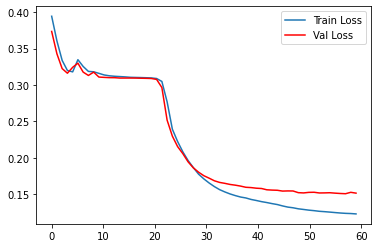

In [26]:
n=1
l = Loss1[n:]
l2 = Val_loss[n:]
plt.plot(np.linspace(0,len(l),len(l)),l,label='Train Loss')
plt.plot(np.linspace(0,len(l2),len(l2)),l2,color='red',label='Val Loss')
plt.legend()

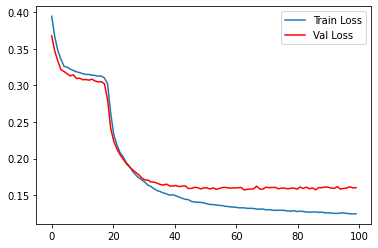

In [ ]:
n=1
l = Loss1[n:]
l2 = Val_loss[n:]
plt.plot(np.linspace(0,len(l),len(l)),l,label='Train Loss')
plt.plot(np.linspace(0,len(l2),len(l2)),l2,color='red',label='Val Loss')
plt.legend()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning:

nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.



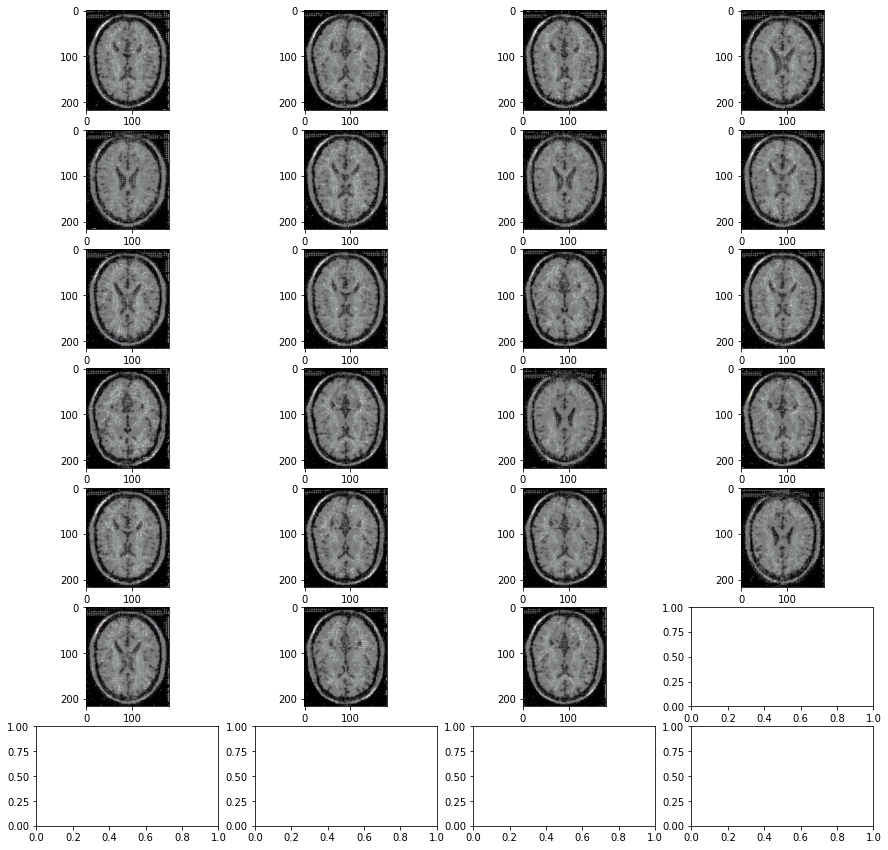

In [ ]:

ax,fig = plt.subplots(7,4,figsize=(15,15))
r=c=1
for img,lab in train_dl:
  img2 = img.to(device)
  im = net.forward(img2)
  im = im[0][0].permute(1,2,0)
  im = im.cpu().detach().numpy()
  fig[r-1][c-1].imshow(im,cmap='gray')
  #plt.show()
  if c%4==0:
    r = r+1
  c = (c+1)%4

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning:

nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.



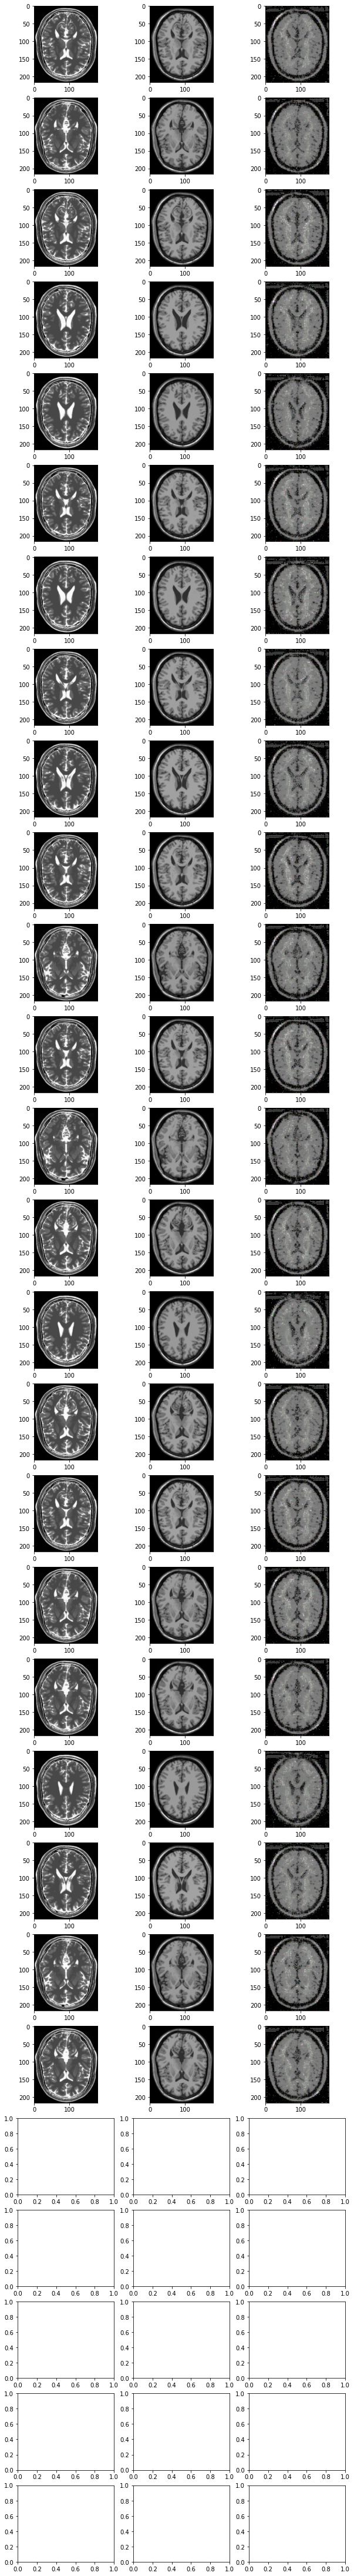

In [ ]:
ax,fig = plt.subplots(7*4,3,figsize=(10,80))
r=c=1
ii = 0
for img,lab in train_dl:
  org = lab[0].permute(1,2,0).detach().numpy()
  img2 = img.to(device)
  im = net.forward(img2)
  im = im[0][0].permute(1,2,0)
  im = im.cpu().detach().numpy()
  fig[r-1][0].imshow(img[0].permute(1,2,0),cmap='gray')
  fig[r-1][1].imshow(org,cmap='gray')
  fig[r-1][2].imshow(im,cmap='gray')
  
  #plt.show()
  #if c%4==0:
  r = r+1
  ii=ii+1
  #c = (c+1)%4

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning:

nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.



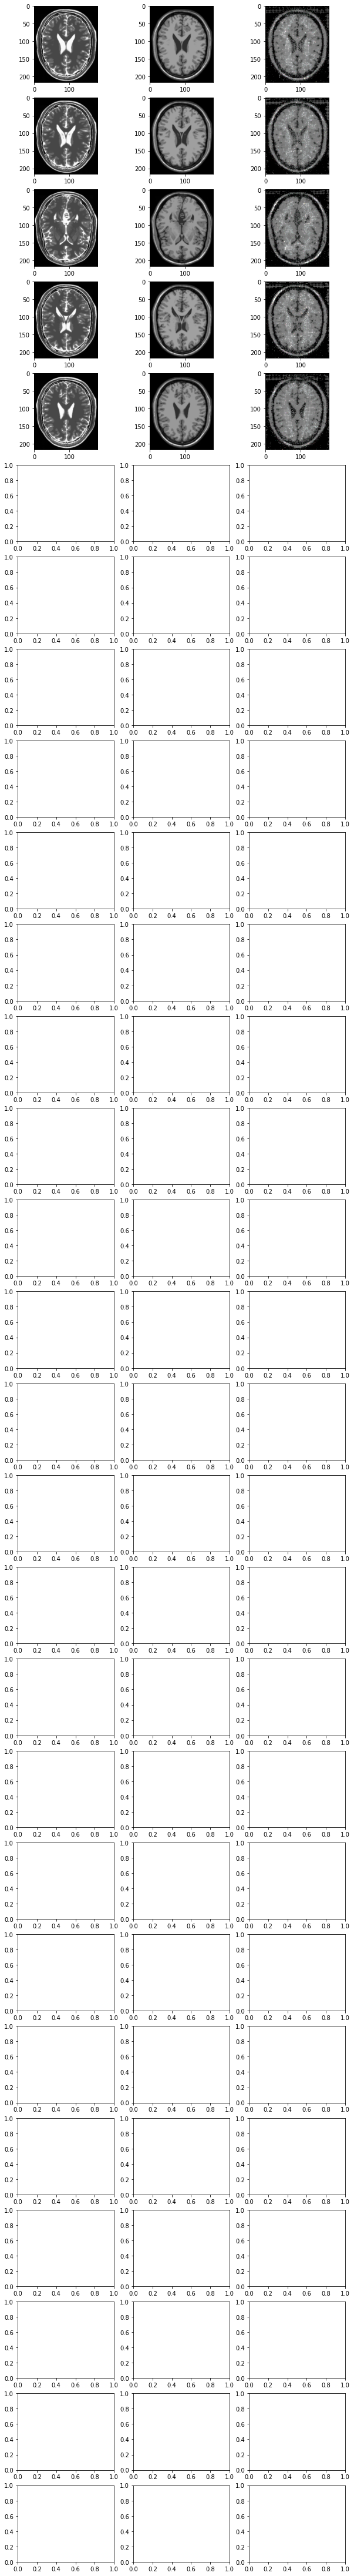

In [ ]:
# Validation
ax,fig = plt.subplots(7*4,3,figsize=(10,80))
r=c=1
ii = 0
for img,lab in val_dl:
  org = lab[0].permute(1,2,0).detach().numpy()
  img2 = img.to(device)
  im = net.forward(img2)
  im = im[0][0].permute(1,2,0)
  im = im.cpu().detach().numpy()
  fig[r-1][0].imshow(img[0].permute(1,2,0),cmap='gray')
  fig[r-1][1].imshow(org,cmap='gray')
  fig[r-1][2].imshow(im,cmap='gray')
  
  #plt.show()
  #if c%4==0:
  r = r+1
  ii=ii+1
  #c = (c+1)%4

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


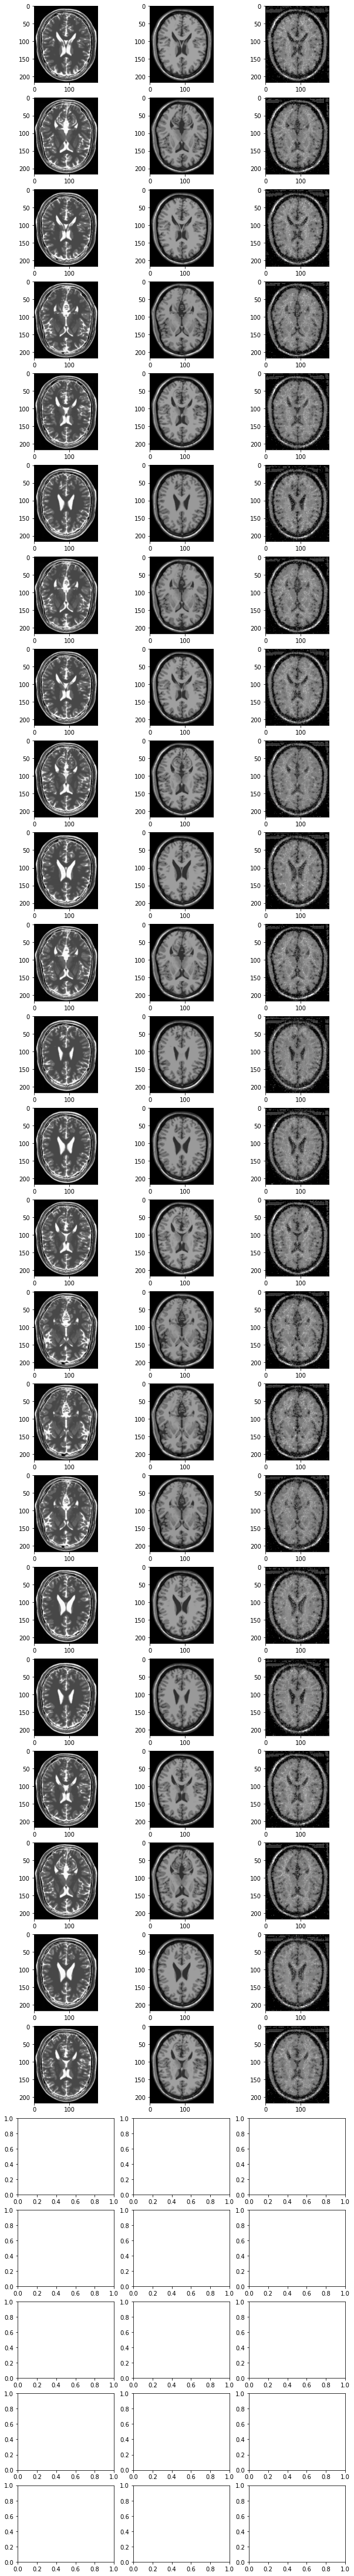

In [ ]:
ax,fig = plt.subplots(7*4,3,figsize=(10,80))
r=c=1
ii = 0
for img,lab in train_dl:
  org = lab[0].permute(1,2,0).detach().numpy()
  img2 = img.to(device)
  im = net.forward(img2)
  im = im[0][0].permute(1,2,0)
  im = im.cpu().detach().numpy()
  fig[r-1][0].imshow(img[0].permute(1,2,0),cmap='gray')
  fig[r-1][1].imshow(org,cmap='gray')
  fig[r-1][2].imshow(im,cmap='gray')
  
  #plt.show()
  #if c%4==0:
  r = r+1
  ii=ii+1
  #c = (c+1)%4